In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/home/manish/Sem II/AI and Ethics/Term Assignment/Fair-regression/data/raw/COMPAS/compas-scores-two-years-violent.csv')
idx = (df['days_b_screening_arrest'] <= 30) & (df['days_b_screening_arrest'] >= -30) & (df['c_charge_degree'] != "O") & (df['v_score_text'] != 'N/A')
df = df[idx]
i = (df['race'] == 'African-American') | (df['race'] == 'Caucasian')
df = df[i]
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,start,end,event,two_year_recid
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,9,159,1,1
6,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,Risk of Violence,1,Low,2014-03-16,2014-03-15,2014-03-18,2,747,0,0
8,14,benjamin franc,benjamin,franc,2013-11-26,Male,1988-06-01,27,25 - 45,Caucasian,...,Risk of Violence,4,Low,2013-11-26,2013-11-25,2013-11-26,0,857,0,0
9,16,kortney coleman,kortney,coleman,2013-01-01,Female,1978-08-22,37,25 - 45,Caucasian,...,Risk of Violence,1,Low,2013-01-01,2013-01-01,2013-01-02,1,1186,0,0
10,18,jarrod turbe,jarrod,turbe,2013-10-09,Male,1974-12-02,41,25 - 45,African-American,...,Risk of Violence,2,Low,2013-10-09,2013-10-08,2013-10-09,0,905,0,0


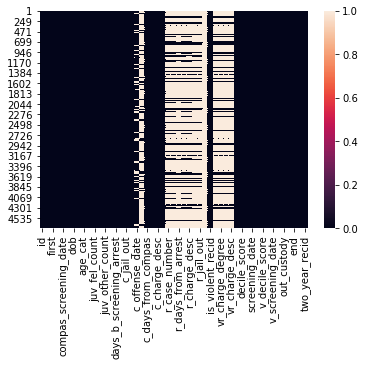

In [3]:
sns.heatmap(df.isnull())

In [4]:
df.drop(['vr_charge_degree', 'r_jail_in', 'r_jail_out', 'r_case_number', 'r_days_from_arrest', 'r_charge_desc', 'vr_offense_date', 'r_charge_degree', 'r_offense_date', 'vr_charge_desc', 'vr_case_number', 'violent_recid', 'c_offense_date', 'c_arrest_date'],axis=1,inplace=True)

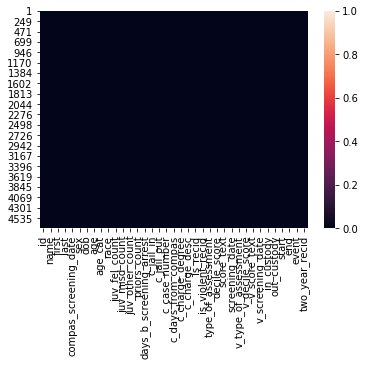

In [5]:
sns.heatmap(df.isnull(), xticklabels=1)

In [6]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,start,end,event,two_year_recid
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,9,159,1,1
6,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,Risk of Violence,1,Low,2014-03-16,2014-03-15,2014-03-18,2,747,0,0
8,14,benjamin franc,benjamin,franc,2013-11-26,Male,1988-06-01,27,25 - 45,Caucasian,...,Risk of Violence,4,Low,2013-11-26,2013-11-25,2013-11-26,0,857,0,0
9,16,kortney coleman,kortney,coleman,2013-01-01,Female,1978-08-22,37,25 - 45,Caucasian,...,Risk of Violence,1,Low,2013-01-01,2013-01-01,2013-01-02,1,1186,0,0
10,18,jarrod turbe,jarrod,turbe,2013-10-09,Male,1974-12-02,41,25 - 45,African-American,...,Risk of Violence,2,Low,2013-10-09,2013-10-08,2013-10-09,0,905,0,0


In [7]:
df = df.drop(['id', 'two_year_recid', 'name', 'first', 'last', 'dob', 'compas_screening_date', 'screening_date', 'v_screening_date', 'c_jail_in', 'c_jail_out', 'c_case_number', 'in_custody', 'out_custody', 'is_recid', 'c_charge_desc', 'type_of_assessment', 'v_type_of_assessment', 'days_b_screening_arrest'], axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3373 entries, 1 to 4742
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 3373 non-null   object 
 1   age                 3373 non-null   int64  
 2   age_cat             3373 non-null   object 
 3   race                3373 non-null   object 
 4   juv_fel_count       3373 non-null   int64  
 5   juv_misd_count      3373 non-null   int64  
 6   juv_other_count     3373 non-null   int64  
 7   priors_count        3373 non-null   int64  
 8   c_days_from_compas  3373 non-null   float64
 9   c_charge_degree     3373 non-null   object 
 10  is_violent_recid    3373 non-null   int64  
 11  decile_score        3373 non-null   int64  
 12  score_text          3373 non-null   object 
 13  v_decile_score      3373 non-null   int64  
 14  v_score_text        3373 non-null   object 
 15  start               3373 non-null   int64  
 16  end   

In [8]:
sex = pd.get_dummies(df['sex'],drop_first=True)
age_cat = pd.get_dummies(df['age_cat'],drop_first=True)
race = pd.get_dummies(df['race'],drop_first=True)
c_charge_degree = pd.get_dummies(df['c_charge_degree'],drop_first=True)
score_text = pd.get_dummies(df['score_text'],drop_first=True)
v_score_text = pd.get_dummies(df['v_score_text'],drop_first=True)

In [9]:
df.drop(['sex','age_cat','race','c_charge_degree', 'score_text', 'v_score_text'],axis=1,inplace=True)

In [10]:
df = pd.concat([df,sex,age_cat,race,c_charge_degree, score_text, v_score_text],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3373 entries, 1 to 4742
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 3373 non-null   int64  
 1   juv_fel_count       3373 non-null   int64  
 2   juv_misd_count      3373 non-null   int64  
 3   juv_other_count     3373 non-null   int64  
 4   priors_count        3373 non-null   int64  
 5   c_days_from_compas  3373 non-null   float64
 6   is_violent_recid    3373 non-null   int64  
 7   decile_score        3373 non-null   int64  
 8   v_decile_score      3373 non-null   int64  
 9   start               3373 non-null   int64  
 10  end                 3373 non-null   int64  
 11  event               3373 non-null   int64  
 12  Male                3373 non-null   uint8  
 13  Greater than 45     3373 non-null   uint8  
 14  Less than 25        3373 non-null   uint8  
 15  Caucasian           3373 non-null   uint8  
 16  M     

In [12]:
X = df.drop('is_violent_recid',axis=1)
y = df['is_violent_recid']

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
sel_f = SelectKBest(chi2, k=19)
X_train_f = sel_f.fit_transform(X, y)
print(sel_f.get_support())
print(X.columns[sel_f.get_support()])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True]
Index(['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'c_days_from_compas', 'decile_score', 'v_decile_score',
       'start', 'end', 'event', 'Male', 'Greater than 45', 'Less than 25',
       'Caucasian', 'Low', 'Medium', 'Low', 'Medium'],
      dtype='object')
